In [1]:
import data_handler
import configs
import train
from absl import logging
import matplotlib.pyplot as plt
import numpy as np

logging.set_verbosity(logging.INFO)

### rotated MNIST dataset

In [2]:
n = 8
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", n, n)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1


Augmented training data


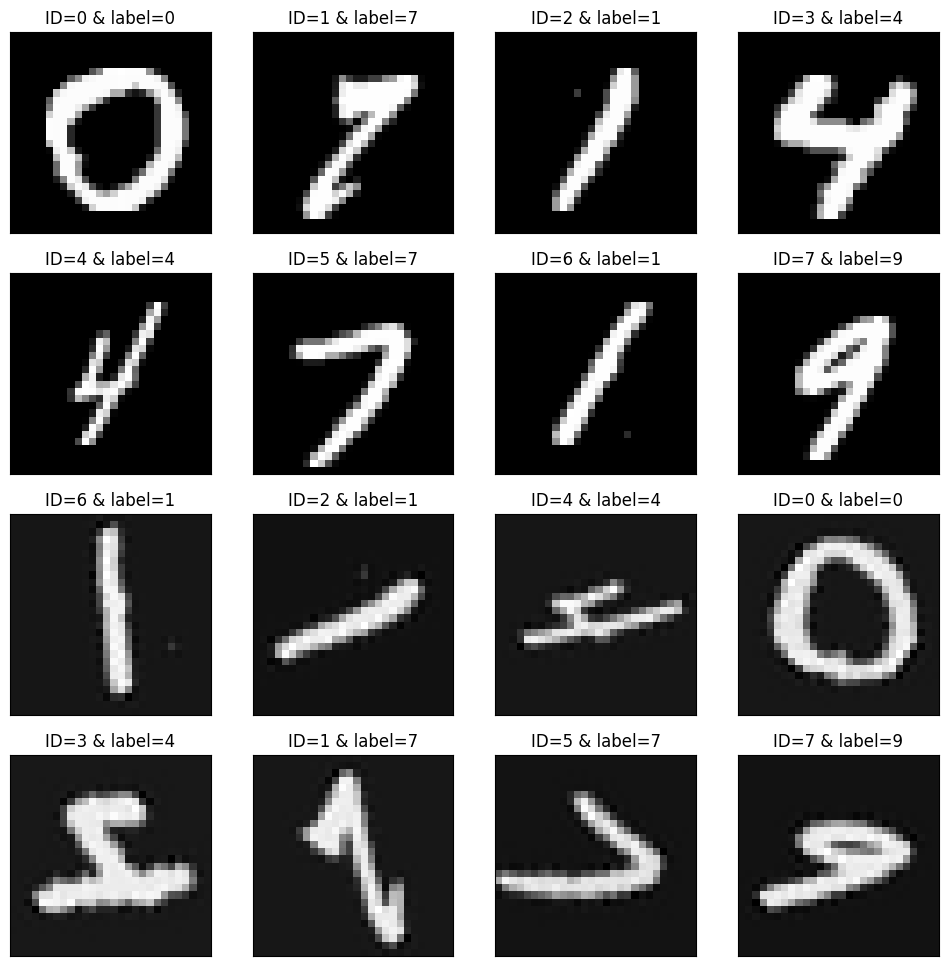

In [3]:
print("Augmented training data")
data_handler.show_img_grid([train_ds['image'][i] for i in range(2*n)],
                           [f'ID={train_ds["id"][i]} & label={train_ds["label"][i]}' for i in range(2*n)])

Test data 1 (only rotated)


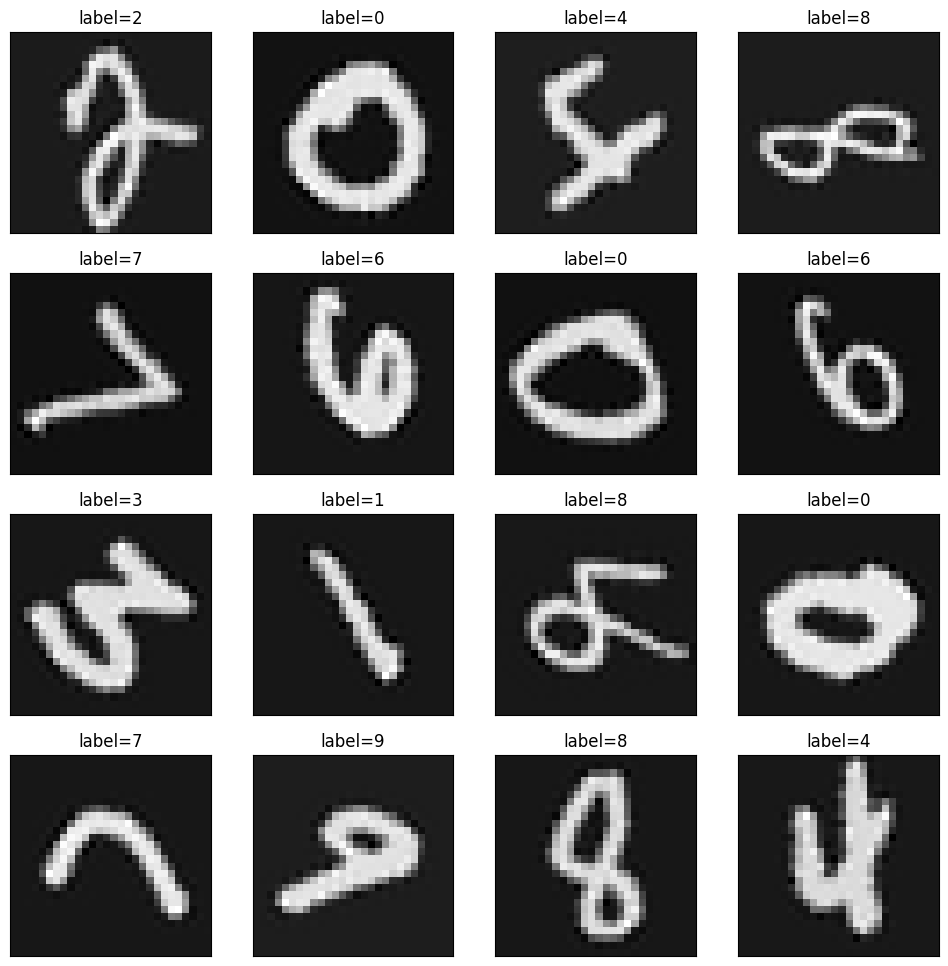

In [6]:
print("Test data 1 (only rotated)")
data_handler.show_img_grid([test1_ds['image'][i] for i in range(16)],
                           [f'label={test1_ds["label"][i]}' for i in range(16)])

Test data 2 (original)


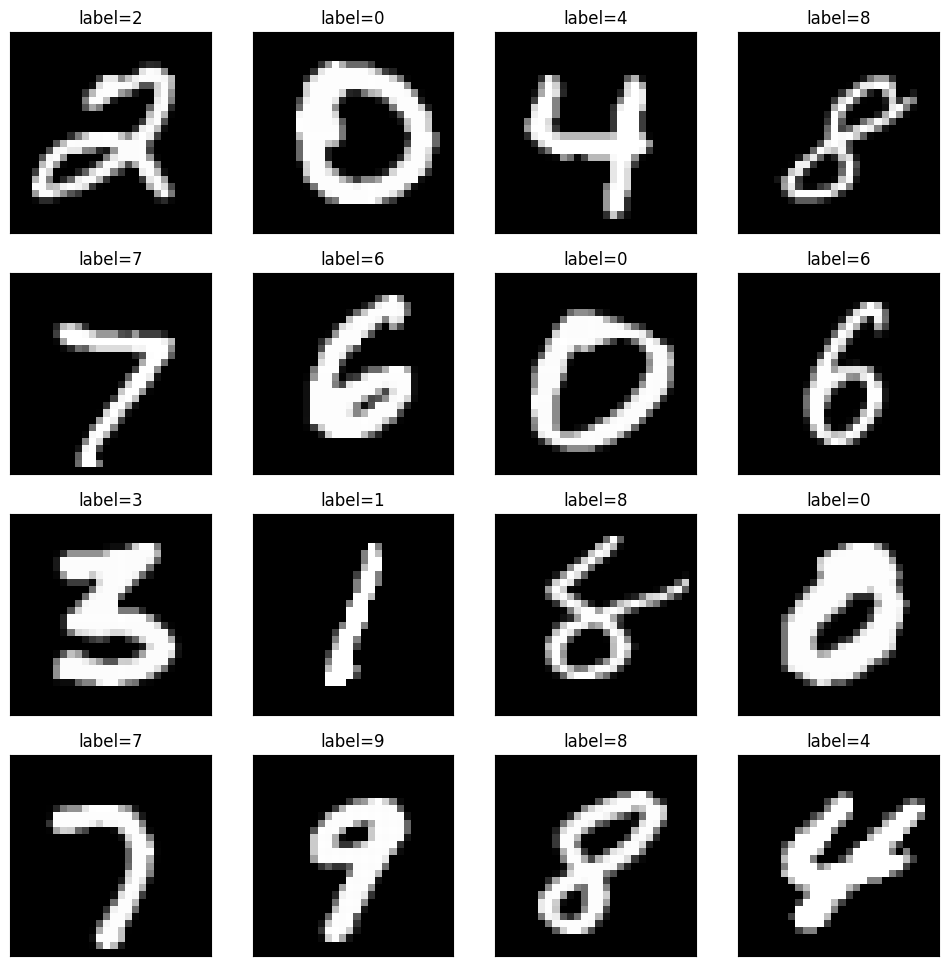

In [7]:
print("Test data 2 (original)")
data_handler.show_img_grid([test2_ds['image'][i] for i in range(16)],
                           [f'label={test2_ds["label"][i]}' for i in range(16)])

### CoRe penalty

In [1]:
import data_handler
import configs
import train
import matplotlib.pyplot as plt
import numpy as np

config = configs.mnist_experiment()
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:epoch: 1, train_loss: 0.5503, train_accuracy: 87.59, test1_loss: 1.6832, test1_accuracy: 56.63, test2_loss: 0.2807, test2_accuracy: 95.79
INFO:absl:epoch: 1, core_penalty: 0.0793
IN

### Base CNN

In [ ]:
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir="models/mnist_base", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

### More augmented data (10x)

In [ ]:
config = configs.mnist_experiment()
aug_size = 2000
state_core = train.train_and_evaluate(config, workdir="models/mnist_core2", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [ ]:
config = configs.mnist_experiment()
config.aug_size = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

In [1]:
import data_handler
import configs
import train
import matplotlib.pyplot as plt
import numpy as np

config = configs.mnist_experiment()
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:epoch: 1, train_loss: 0.5503, train_accuracy: 87.59, test1_loss: 1.6832, test1_accuracy: 56.63, test2_loss: 0.2807, test2_accuracy: 95.79
INFO:absl:epoch: 2, train_loss: 0.3477, tra

In [4]:
config = configs.mnist_experiment()
config.train_size = 1000
config.aug_size = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_core2", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:epoch: 1, train_loss: 1.5027, train_accuracy: 54.74, test1_loss: 1.1356, test1_accuracy: 63.65, test2_loss: 0.7946, test2_accuracy: 78.90
INFO:absl:epoch: 2, train_loss: 0.8079, tra

In [2]:
config.lambda_core = 0.0
state_base = train.train_and_evaluate(config, workdir="models/mnist_base", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.5212, train_accuracy: 87.97, test1_loss: 1.9361, test1_accuracy: 55.20, test2_loss: 0.2515, test2_accuracy: 96.41
INFO:absl:epoch: 2, train_loss: 0.2783, train_accuracy: 95.60, test1_loss: 1.5735, test1_accuracy: 60.33, test2_loss: 0.2464, test2_accuracy: 96.19
INFO:absl:epoch: 3, train_loss: 0.2361, train_accuracy: 96.51, test1_loss: 1.4506, test1_accuracy: 64.43, test2_loss: 0.2403, test2_accuracy: 96.05
INFO:absl:epoch: 4, train_loss: 0.2333, train_accuracy: 96.54, test1_loss: 1.3028, test1_accuracy: 65.46, test2_loss: 0.2229, test2_accuracy: 96.89
INFO:absl:epoch: 5, train_loss: 0.2180, train_accuracy: 96.96, test1_loss: 1.4035, test1_accuracy: 63.83, test2_loss: 0.2124, test2_accuracy: 96.95
INFO:absl:epoch: 6, train_loss: 0.2081, train_accuracy: 97.26, test1_loss: 1.3265, test1_accuracy: 69.57, test2_loss: 0.2026, test2_accuracy: 97.13
INFO:absl:epoch: 7, train_loss: 0.2062, train_accuracy: 97.24, test1_loss: 1.3904, test1_accuracy: 64.94, test2_

In [5]:
config = configs.mnist_experiment()
config.train_size = 1000
config.aug_size = 1000
config.lambda_core = 0.0
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_base2", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:epoch: 1, train_loss: 1.5618, train_accuracy: 50.89, test1_loss: 1.0526, test1_accuracy: 69.63, test2_loss: 0.7049, test2_accuracy: 83.56
INFO:absl:epoch: 2, train_loss: 0.8041, tra

In [2]:
config = configs.mnist_experiment()
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", config.train_size, config.aug_size)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1


In [4]:
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.5503, train_accuracy: 87.59, test1_loss: 1.6832, test1_accuracy: 56.63, test2_loss: 0.2807, test2_accuracy: 95.79
INFO:absl:epoch: 2, train_loss: 0.3477, train_accuracy: 94.80, test1_loss: 1.4887, test1_accuracy: 61.02, test2_loss: 0.2814, test2_accuracy: 95.95
INFO:absl:epoch: 3, train_loss: 0.2990, train_accuracy: 96.10, test1_loss: 1.4393, test1_accuracy: 64.31, test2_loss: 0.2505, test2_accuracy: 96.81
INFO:absl:epoch: 4, train_loss: 0.2627, train_accuracy: 96.49, test1_loss: 1.3160, test1_accuracy: 66.02, test2_loss: 0.2619, test2_accuracy: 96.31
INFO:absl:epoch: 5, train_loss: 0.3714, train_accuracy: 95.33, test1_loss: 2.0580, test1_accuracy: 54.94, test2_loss: 0.3483, test2_accuracy: 95.96
INFO:absl:epoch: 6, train_loss: 0.2885, train_accuracy: 96.71, test1_loss: 1.3814, test1_accuracy: 66.39, test2_loss: 0.2420, test2_accuracy: 96.99
INFO:absl:epoch: 7, train_loss: 0.2659, train_accuracy: 96.94, test1_loss: 1.5454, test1_accuracy: 57.89, test2_

In [5]:
config = configs.mnist_experiment()
config.lambda_core = 0
state_core = train.train_and_evaluate(config, workdir="models/mnist_base", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 0.5212, train_accuracy: 87.97, test1_loss: 1.9361, test1_accuracy: 55.20, test2_loss: 0.2515, test2_accuracy: 96.41
INFO:absl:epoch: 2, train_loss: 0.2783, train_accuracy: 95.60, test1_loss: 1.5735, test1_accuracy: 60.33, test2_loss: 0.2464, test2_accuracy: 96.19
INFO:absl:epoch: 3, train_loss: 0.2361, train_accuracy: 96.51, test1_loss: 1.4506, test1_accuracy: 64.43, test2_loss: 0.2403, test2_accuracy: 96.05
INFO:absl:epoch: 4, train_loss: 0.2333, train_accuracy: 96.54, test1_loss: 1.3028, test1_accuracy: 65.46, test2_loss: 0.2229, test2_accuracy: 96.89
INFO:absl:epoch: 5, train_loss: 0.2180, train_accuracy: 96.96, test1_loss: 1.4035, test1_accuracy: 63.83, test2_loss: 0.2124, test2_accuracy: 96.95
INFO:absl:epoch: 6, train_loss: 0.2081, train_accuracy: 97.26, test1_loss: 1.3265, test1_accuracy: 69.57, test2_loss: 0.2026, test2_accuracy: 97.13
INFO:absl:epoch: 7, train_loss: 0.2062, train_accuracy: 97.24, test1_loss: 1.3904, test1_accuracy: 64.94, test2_

In [3]:
config = configs.mnist_experiment()
config.lambda_core = 0
state = train.train_and_evaluate(config, workdir="models/mnist_experiment_base", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

Core penalty:  Traced<ConcreteArray(0.02189461514353752, dtype=float32)>with<JVPTrace(level=2/0)> with
  primal = Array(0.02189462, dtype=float32)
  tangent = Traced<ShapedArray(float32[])>with<JaxprTrace(level=1/0)> with
    pval = (ShapedArray(float32[]), None)
    recipe = JaxprEqnRecipe(eqn_id=<object object at 0x2c5541000>, in_tracers=(Traced<ShapedArray(float32[120]):JaxprTrace(level=1/0)>,), out_tracer_refs=[<weakref at 0x2c55e0db0; to 'JaxprTracer' at 0x2c55e0d60>], out_avals=[ShapedArray(float32[])], primitive=pjit, params={'jaxpr': { lambda ; a:f32[120]. let
    b:f32[] = reduce_sum[axes=(0,)] a
    c:f32[] = div b 120.0
  in (c,) }, 'in_shardings': (UnspecifiedValue,), 'out_shardings': (UnspecifiedValue,), 'resource_env': None, 'donated_invars': (False,), 'name': '_mean', 'keep_unused': False, 'inline': True}, effects=set(), source_info=SourceInfo(traceback=<jaxlib.xla_extension.Traceback object at 0x2c55da3f0>, name_stack=NameStack(stack=(Transform(name='jvp'),))))
Core pen

KeyboardInterrupt: 

In [5]:
config = configs.mnist_experiment()
state_core = train.train_and_evaluate(config, workdir="models/mnist_experiment_core", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:epoch: 1, train_loss: 1.0280, train_accuracy: 87.83, test1_loss: 1.8329, test1_accuracy: 49.87, test2_loss: 0.7642, test2_accuracy: 96.31
INFO:absl:epoch: 2, train_loss: 0.7508, train_accuracy: 96.34, test1_loss: 1.6724, test1_accuracy: 56.91, test2_loss: 0.7176, test2_accuracy: 97.54
INFO:absl:epoch: 3, train_loss: 0.7189, train_accuracy: 96.75, test1_loss: 1.6341, test1_accuracy: 57.33, test2_loss: 0.7098, test2_accuracy: 97.82
INFO:absl:epoch: 4, train_loss: 0.7122, train_accuracy: 97.39, test1_loss: 1.5942, test1_accuracy: 59.68, test2_loss: 0.6898, test2_accuracy: 97.68
INFO:absl:epoch: 5, train_loss: 0.6974, train_accuracy: 97.38, test1_loss: 1.5581, test1_accuracy: 59.99, test2_loss: 0.6823, test2_accuracy: 98.02
INFO:absl:epoch: 6, train_loss: 0.6946, train_accuracy: 97.70, test1_loss: 1.5306, test1_accuracy: 62.11, test2_loss: 0.6821, test2_accuracy: 97.98
INFO:absl:epoch: 7, train_loss: 0.6924, train_accuracy: 97.65, test1_loss: 1.5043, test1_accuracy: 64.38, test2_